EDA and Feature Engineering using Black Friday Dataset

In [3]:
## Import required libraries 



import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 


from sklearn.metrics import mean_squared_error 
from sklearn.metrics import make_scorer 

from sklearn.model_selection import GridSearchCV 

#For Warnings
import warnings
warnings.filterwarnings('ignore') 

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')



In [5]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:

df = train_df.append(test_df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df = df.drop(['User_ID','Product_ID'] , axis = 1)

In [8]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
def duplicated_func(df) : 
    
    print(f"Total number of duplicated rows in data are: {df.duplicated().sum()}") 


duplicated_func(df)

Total number of duplicated rows in data are: 147232


There are no duplicate rows in the dataset.

In [10]:
def cat_cols(df) : 
    o = (df.dtypes == 'object')
    object_cols = o[o].index 
    return object_cols

object_cols = cat_cols(df)
print(f"Categorical Columns are : {object_cols}")

Categorical Columns are : Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')


In [11]:
# Encode Gender column. 

df['Gender'] = df['Gender'].map({'M' : 1 , 'F' : 0})

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
# Encode Age column 

df['Age'] = df['Age'].map({'0-17' : 1 , '18-25': 2 , '26-35' : 3 ,'36-45' : 4  ,'46-50' : 5 ,'51-55' : 6 ,  '55+' : 7  })


In [14]:
df = df.drop('City_Category' , axis = 1)

In [15]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({ '2' : 2 , '4+' : 4 , '3' : 3, '1' : 1, '0' : 0})


In [17]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [18]:
def missing_vals(df): 
    for i in df :
        if df[i].isnull().sum() > 0 : 
            print(f"{i} : {df[i].isnull().sum()} missing values out of {len(df[i])}")
    else : 
        print("No missing columns.")
missing_vals(df)


Product_Category_2 : 245982 missing values out of 783667
Product_Category_3 : 545809 missing values out of 783667
Purchase : 233599 missing values out of 783667
No missing columns.


Observation : 

1)Product category 2 : 24582 missing values out of 783667 <br>
2)Product category 3 : 545809 missing values out of 783667 <br>
3)Purchase : 233599 missing values out of 783667  <br>


NOTE : Missing values of Purchase are from test data so we do not need to worry about that column.


In [19]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

Product Category 2 is a discreate category column.

In [20]:
## Replace the missing value by using mode of a discrete category columm.



df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0] )

In [21]:
missing_vals(df)

Product_Category_3 : 545809 missing values out of 783667
Purchase : 233599 missing values out of 783667
No missing columns.


In [22]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0] )

In [24]:
missing_vals(df)

Purchase : 233599 missing values out of 783667
No missing columns.


Data VIsualization

In [25]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

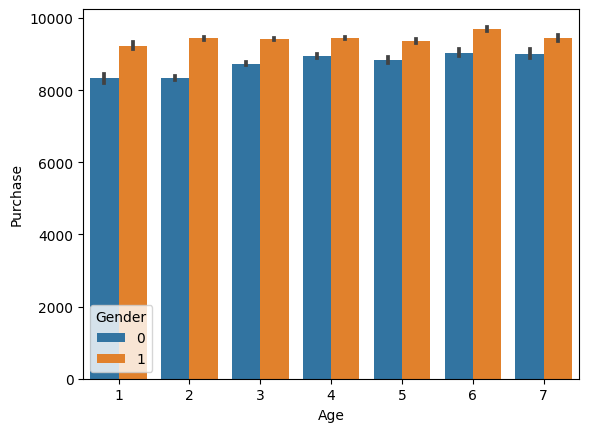

In [26]:
sns.barplot('Age' , y = 'Purchase' , hue = 'Gender' , data = df)

Men has higher shopping records than women, which is contradictory

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

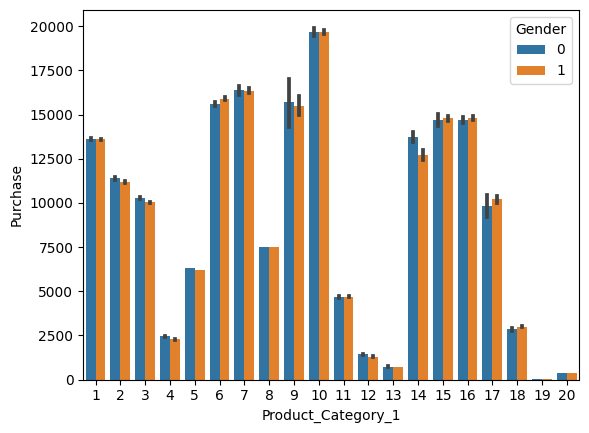

In [27]:
sns.barplot('Product_Category_1' , y = 'Purchase' , hue = 'Gender' , data = df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

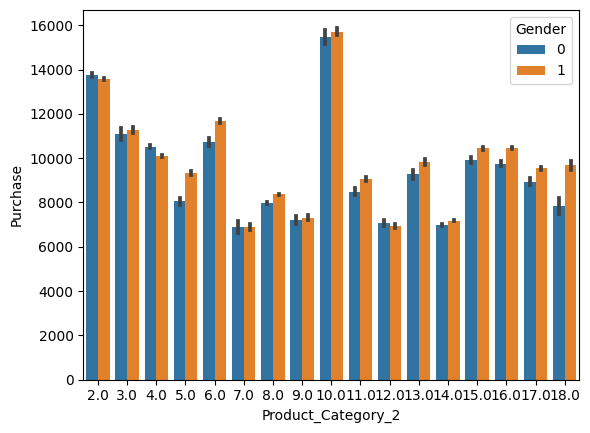

In [28]:
sns.barplot('Product_Category_2' , y = 'Purchase' , hue = 'Gender' , data = df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

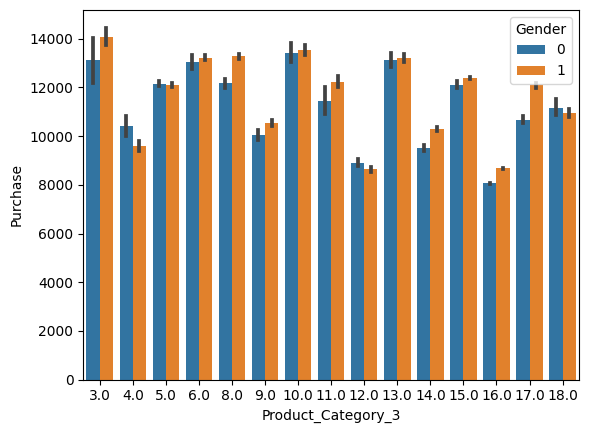

In [29]:
sns.barplot('Product_Category_3' , y = 'Purchase' , hue = 'Gender' , data = df)

Feature Scaling

In [30]:
df_test = [df['Purchase'].isnull()] 

In [31]:
df_train = df[~df['Purchase'].isnull()]

In [32]:
features = df_train.drop('Purchase' , axis = 1)
label = df_train['Purchase']

In [33]:
def splitted_data(features , label) : 
    x_train,x_test,y_train,y_test = train_test_split(features, label , test_size = 0.3)
    
    print(f"Shape of x_train : {x_train.shape}")
    print(f"Shape of y_train : {y_train.shape}")
    print(f"Shape of x_test : {x_test.shape}")
    print(f"Shape of y_test: {y_test.shape}")
    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = splitted_data(features , label)

Shape of x_train : (385047, 8)
Shape of y_train : (385047,)
Shape of x_test : (165021, 8)
Shape of y_test: (165021,)


In [34]:
# Feature scaling 


sc = StandardScaler() 

x_train_columns = x_train.columns
x_test_columns = x_test.columns 

x_train[x_train_columns] = sc.fit_transform(x_train[x_train_columns])
x_test[x_test_columns] = sc.transform(x_test[x_test_columns]) 

In [35]:
x_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
300432,0.572833,2.584822,-0.166153,0.110424,1.199879,-1.119348,-0.293682,0.368985
230080,0.572833,-1.106626,-0.625881,1.660431,1.199879,-0.103524,1.103567,0.368985
463393,0.572833,-0.368337,0.446817,-1.439584,-0.833418,-0.611436,-1.225181,-1.091591
442135,0.572833,1.846533,-1.085609,-0.664580,1.199879,-0.103524,-0.293682,0.368985
127378,-1.745710,1.846533,-1.238852,1.660431,-0.833418,-0.103524,1.802191,0.368985


In [36]:
pred_dict = {}

In [37]:
lr_model = LinearRegression()
lr_model.fit(x_train , y_train)
lr_y_pred = lr_model.predict(x_test)

pred_dict['Linear_y_pred'] = lr_y_pred 


In [38]:
lasso_model = Lasso()

lasso_model.fit(x_train,y_train)
lasso_y_pred = lasso_model.predict(x_test)

pred_dict['Lasso_y_pred'] = lasso_y_pred

In [39]:
ridge_model = Ridge()

ridge_model.fit(x_train,y_train)
ridge_y_pred = ridge_model.predict(x_test)

pred_dict['ridge_y_pred'] = ridge_y_pred

In [40]:
tree_model = DecisionTreeRegressor()

tree_model.fit(x_train , y_train)
tree_y_pred = tree_model.predict(x_test)

pred_dict['Tree_y_pred'] = tree_y_pred 


In [41]:
pred_dict['Original_y_test'] = y_test 
 

In [42]:
campare_df = pd.DataFrame(pred_dict)

campare_df.head()

,Linear_y_pred,Lasso_y_pred,ridge_y_pred,Tree_y_pred,Original_y_test
142461,8249.589229,8252.956768,8249.591777,16226.615385,8178.0
7403,7988.239528,7990.949202,7988.240935,10053.000000,4032.0
209310,9622.992790,9621.345091,9622.990148,7725.333333,7020.0
250551,11231.464069,11231.175635,11231.456052,15652.000000,11724.0
217356,10338.165238,10341.763282,10338.163846,12926.000000,12919.0


In [43]:
campare_df.to_csv('Model_predictions.csv' , index = False)

In [44]:
import math 

def regression_metrics(y_test , y_pred) : 

    error = mean_squared_error(y_test,y_pred) 
    sqrt_error = math.sqrt(error)

    print(f"Sqrt error : {sqrt_error:.2f}")


regression_metrics(y_test , pred_dict['Linear_y_pred'])
regression_metrics(y_test , pred_dict['Lasso_y_pred'])
regression_metrics(y_test , pred_dict['ridge_y_pred'])
regression_metrics(y_test , pred_dict['Tree_y_pred'])

Sqrt error : 4675.87
Sqrt error : 4675.89
Sqrt error : 4675.87
Sqrt error : 3234.64


DecisionTreeRegressor Model performed best for regression models out of linear,lasso,ridge  and tree regressor.